In [ ]:
pip install snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 2.7 MB/s eta 0:00:00


In [ ]:
pip install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2a2c39ff40e1f543e7509359e28d94681a7c171d4d91f2ddd82929e07f0b2719
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
#from emot.emo_unicode import UNICODE_EMOJI
from emoji import EMOJI_DATA

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [ ]:
 query = "(Adani OR Hindenburg OR #AdaniVsHindenburg OR #HindenburgReport) since:2023-02-01 until:2023-03-01"
 tweets = []
 for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
     if i>10000:
         break
     else:
         tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
 df = pd.DataFrame(tweets, columns = ['Date', 'ID', 'url', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
 df.to_csv('sentiment1.csv', mode = 'a')

<ipython-input-12-bc6d274ccd6f>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])


KeyboardInterrupt: ignored

In [ ]:
df =  pd.read_csv('sentiment1.csv', encoding = 'unicode_escape')
df.head(10)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2023-02-28 23:59:49+00:00,1630719450835025922,https://twitter.com/Shailen18768629/status/163...,Shailen18768629,Twitter for Android,NaN,@gautam_adani @narendramodi @AmitShah à¤à¤ à...,0,0
1,1,2023-02-28 23:59:31+00:00,1630719376994484225,https://twitter.com/Dharma4X/status/1630719376...,Dharma4X,TweetDeck,NaN,@SSR__jaihind @SwamyBhakt @Swamy39 @IndiaTamiz...,3,1
2,2,2023-02-28 23:59:25+00:00,1630719350272569344,https://twitter.com/Anson_Edment/status/163071...,Anson_Edment,Twitter for Android,Moon,I shorted this....way before this Adani scam a...,0,0
3,3,2023-02-28 23:58:43+00:00,1630719175844044800,https://twitter.com/Dravid1987/status/16307191...,Dravid1987,Twitter Web App,NaN,Adani back on track ? https://t.co/5RorkwnwF4,0,0
4,4,2023-02-28 23:58:19+00:00,1630719075587436545,https://twitter.com/StocksbyPrakhar/status/163...,StocksbyPrakhar,Twitter Web App,India,@iramyram Adani Ent and Indices.,1,0
5,5,2023-02-28 23:56:25+00:00,1630718597139173376,https://twitter.com/Kachha_Pakka/status/163071...,Kachha_Pakka,Twitter for Android,NaN,@TVMohandasPai How do explain the PE value...w...,0,0
6,6,2023-02-28 23:56:10+00:00,1630718534425939970,https://twitter.com/Thakurgaurav007/status/163...,Thakurgaurav007,Twitter for Android,"Mumbai, India",@roshnikushal Thats the main reason BJP and hi...,0,0
7,7,2023-02-28 23:55:38+00:00,1630718401172881408,https://twitter.com/rockyrocksnow/status/16307...,rockyrocksnow,Twitter for iPhone,Union of India,"@Amit_Gulecha @TanvirRoyal1 Bhai Amit, tum aur...",0,0
8,8,2023-02-28 23:55:35+00:00,1630718387147116544,https://twitter.com/AskAmbedkar/status/1630718...,AskAmbedkar,Twitter for Android,"Nagpur of Deekshabhoomi, India",If borrowing more than three times what you ar...,2,0
9,9,2023-02-28 23:55:34+00:00,1630718385230348288,https://twitter.com/AskAmbedkar/status/1630718...,AskAmbedkar,Twitter for Android,"Nagpur of Deekshabhoomi, India","Calling it bad business, not con is bad teachi...",1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10001 non-null  int64 
 1   Date            10001 non-null  object
 2   ID              10001 non-null  int64 
 3   url             10001 non-null  object
 4   username        10001 non-null  object
 5   source          10001 non-null  object
 6   location        5959 non-null   object
 7   tweet           10001 non-null  object
 8   num_of_likes    10001 non-null  int64 
 9   num_of_retweet  10001 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.5+ KB


In [ ]:
df.location.isna().sum()

4042

In [ ]:
df['location'] = df['location'].fillna('Unknown')


In [ ]:
eng_stop_words = list(stopwords.words('english'))


In [ ]:
import emoji
emoji = list(emoji.EMOJI_DATA.keys())


In [ ]:
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets)

In [ ]:
df.head(5)


,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets
0,0,2023-02-28 23:59:49+00:00,1630719450835025922,https://twitter.com/Shailen18768629/status/163...,Shailen18768629,Twitter for Android,Unknown,@gautam_adani @narendramodi @AmitShah à¤à¤ à...,0,0,adani à¤à¤ à¤®à¤¾à¤¨à¤¨à¥à¤ à¤¶à¥à¤°à¥ à¤à...
1,1,2023-02-28 23:59:31+00:00,1630719376994484225,https://twitter.com/Dharma4X/status/1630719376...,Dharma4X,TweetDeck,Unknown,@SSR__jaihind @SwamyBhakt @Swamy39 @IndiaTamiz...,3,1,jaihind kochhar rajan mahajan adanihindenburg ...
2,2,2023-02-28 23:59:25+00:00,1630719350272569344,https://twitter.com/Anson_Edment/status/163071...,Anson_Edment,Twitter for Android,Moon,I shorted this....way before this Adani scam a...,0,0,shorted thisway adani scam shit trend end star...
3,3,2023-02-28 23:58:43+00:00,1630719175844044800,https://twitter.com/Dravid1987/status/16307191...,Dravid1987,Twitter Web App,Unknown,Adani back on track ? https://t.co/5RorkwnwF4,0,0,adani back track
4,4,2023-02-28 23:58:19+00:00,1630719075587436545,https://twitter.com/StocksbyPrakhar/status/163...,StocksbyPrakhar,Twitter Web App,India,@iramyram Adani Ent and Indices.,1,0,adani ent index


In [ ]:
#another data wrangling process
# convert the tweet text into a string separate with " "
tweets_string = df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

In [ ]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [ ]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sent = df['Sentiment'].value_counts()
sent


Neutral     5768
Positive    2536
Negative    1697
Name: Sentiment, dtype: int64

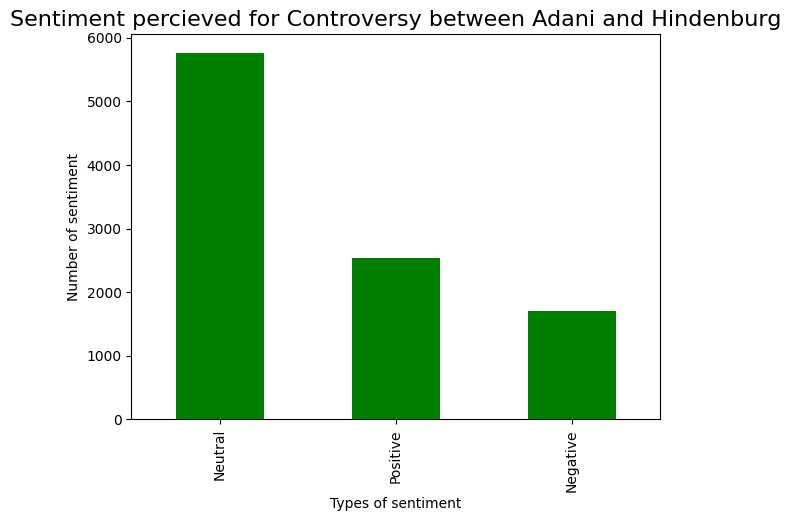

In [ ]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sentiment percieved for Controversy between Adani and Hindenburg', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

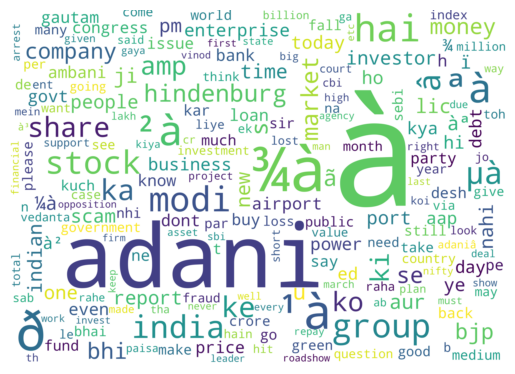

In [ ]:
# Displaying the most talked about word in a word cloud 
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
w_cloud.to_file("wordcloud.png")

In [ ]:
df.to_csv('final_tweet.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets,Polarity,Sentiment
0,0,2023-02-28 23:59:49+00:00,1630719450835025922,https://twitter.com/Shailen18768629/status/163...,Shailen18768629,Twitter for Android,Unknown,@gautam_adani @narendramodi @AmitShah à¤à¤ à...,0,0,adani à¤à¤ à¤®à¤¾à¤¨à¤¨à¥à¤ à¤¶à¥à¤°à¥ à¤à...,0.0,Neutral
1,1,2023-02-28 23:59:31+00:00,1630719376994484225,https://twitter.com/Dharma4X/status/1630719376...,Dharma4X,TweetDeck,Unknown,@SSR__jaihind @SwamyBhakt @Swamy39 @IndiaTamiz...,3,1,jaihind kochhar rajan mahajan adanihindenburg ...,0.0,Neutral
2,2,2023-02-28 23:59:25+00:00,1630719350272569344,https://twitter.com/Anson_Edment/status/163071...,Anson_Edment,Twitter for Android,Moon,I shorted this....way before this Adani scam a...,0,0,shorted thisway adani scam shit trend end star...,-0.2,Negative
3,3,2023-02-28 23:58:43+00:00,1630719175844044800,https://twitter.com/Dravid1987/status/16307191...,Dravid1987,Twitter Web App,Unknown,Adani back on track ? https://t.co/5RorkwnwF4,0,0,adani back track,0.0,Neutral
4,4,2023-02-28 23:58:19+00:00,1630719075587436545,https://twitter.com/StocksbyPrakhar/status/163...,StocksbyPrakhar,Twitter Web App,India,@iramyram Adani Ent and Indices.,1,0,adani ent index,0.0,Neutral


In [ ]:
processed_dataset = df[["tweet", "Processed_Tweets"]]

In [ ]:
processed_dataset.head(5)

,tweet,Processed_Tweets
0,@gautam_adani @narendramodi @AmitShah à¤à¤ à...,adani à¤à¤ à¤®à¤¾à¤¨à¤¨à¥à¤ à¤¶à¥à¤°à¥ à¤à...
1,@SSR__jaihind @SwamyBhakt @Swamy39 @IndiaTamiz...,jaihind kochhar rajan mahajan adanihindenburg ...
2,I shorted this....way before this Adani scam a...,shorted thisway adani scam shit trend end star...
3,Adani back on track ? https://t.co/5RorkwnwF4,adani back track
4,@iramyram Adani Ent and Indices.,adani ent index
